<h3>Salario de ingeniero de datos en 2024<h3>


https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024

Este conjunto de datos proporciona información sobre los salarios y los atributos de empleo de los ingenieros de datos para el año 2024. Incluye información como el salario, el cargo, el nivel de experiencia, el tipo de empleo, la residencia del empleado, la proporción de trabajo remoto, la ubicación de la empresa y el tamaño de la empresa.

El conjunto de datos permite analizar las tendencias salariales, los patrones de empleo y las variaciones geográficas en los roles de ingeniería de datos. Puede ser utilizado por investigadores, analistas y organizaciones para comprender el panorama cambiante del empleo y la compensación de la ingeniería de datos.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [ ]:
dt = pd.read_csv("/content/sample_data/SalaryIA/salaries (2).csv")
dt

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Dividir el conjunto de datos en 70% para entrenamiento y 30% para pruebas
train_data, test_data = train_test_split(dt, test_size=0.3, random_state=42)

print("Entrenamiento:", train_data.shape)
print("Prueba:", test_data.shape)

Entrenamiento: (11573, 11)
Prueba: (4961, 11)


In [ ]:
train_data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14159,2023,MI,FT,Data Scientist,151410,USD,151410,US,100,US,M
4339,2024,MI,FT,Data Scientist,111600,USD,111600,US,0,US,L
8293,2023,SE,FT,Data Engineer,130000,USD,130000,US,0,US,M
9320,2023,MI,FT,Data Analyst,78000,USD,78000,US,0,US,M
6494,2023,SE,FT,Data Scientist,132500,USD,132500,US,0,US,M


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 14159 to 15795
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           11573 non-null  int64 
 1   experience_level    11573 non-null  object
 2   employment_type     11573 non-null  object
 3   job_title           11573 non-null  object
 4   salary              11573 non-null  int64 
 5   salary_currency     11573 non-null  object
 6   salary_in_usd       11573 non-null  int64 
 7   employee_residence  11573 non-null  object
 8   remote_ratio        11573 non-null  int64 
 9   company_location    11573 non-null  object
 10  company_size        11573 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [ ]:
train_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
train_data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,11573.000000,1.157300e+04,11573.000000,11573.000000
mean,2023.223019,1.635011e+05,150284.349261,31.837034
std,0.715815,3.541123e+05,68903.334744,46.183542
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103200.000000,0.000000
50%,2023.000000,1.422000e+05,142000.000000,0.000000
75%,2024.000000,1.885000e+05,186000.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
print("Datos unicos")
dict=[]
for i in train_data.columns:
  print(f'{i} --> {train_data[i].unique()}')

Datos unicos
work_year --> [2023 2024 2022 2021 2020]
experience_level --> ['MI' 'SE' 'EX' 'EN']
employment_type --> ['FT' 'CT' 'FL' 'PT']
job_title --> ['Data Scientist' 'Data Engineer' 'Data Analyst'
 'Machine Learning Engineer' 'Data Specialist' 'Data Science'
 'Analytics Engineer' 'Applied Scientist' 'ML Engineer'
 'Business Intelligence Engineer' 'Research Scientist'
 'Machine Learning Scientist' 'BI Developer' 'Data Analytics Manager'
 'Business Intelligence Analyst' 'Head of Data' 'Data Analytics Engineer'
 'Data Modeler' 'Lead Data Scientist' 'Data Architect' 'AI Scientist'
 'Data Infrastructure Engineer' 'Research Analyst'
 'Deep Learning Engineer' 'Research Engineer'
 'Encounter Data Management Professional' 'Lead Data Engineer'
 'Data Visualization Specialist' 'Data Science Manager'
 'Business Intelligence' 'Decision Scientist' 'Data Science Consultant'
 'Data Strategist' 'Applied Machine Learning Scientist'
 'Principal Data Scientist' 'Data Manager'
 'Business Intelligence 

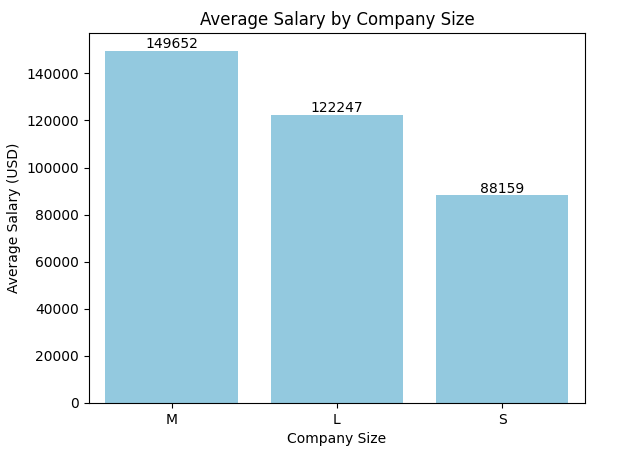

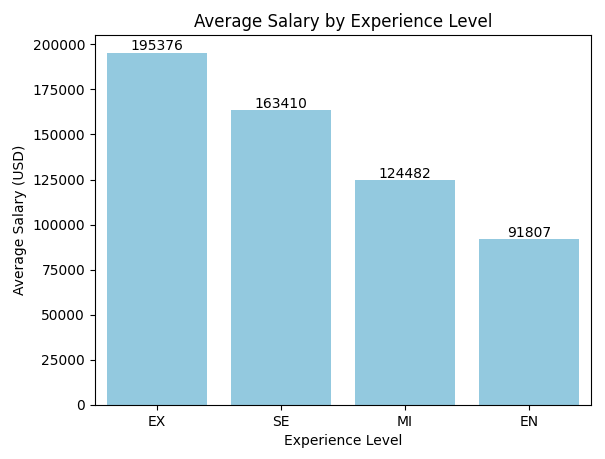

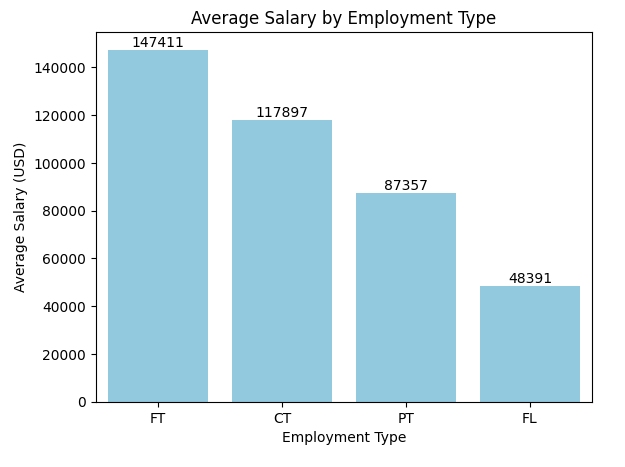

In [ ]:
profile = ProfileReport(train_data, title="EDA", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**PREGUNTAS, RESPUESTAS Y TECNICAS**

**¿Cuál es el rango de salarios para los ingenieros de datos en 2024?**
Respuesta: El rango de salarios es de $15,000 a $30,400,000.
Técnica: Análisis numérico (cálculo del rango) y gráfico (gráfico de caja para mostrar la distribución y los valores atípicos).


**¿Cuál es el salario promedio de un ingeniero de datos en 2024?**
Respuesta: El salario promedio es de $163,501.12.
Técnica: Análisis numérico (cálculo del promedio).


**¿Cómo se distribuyen los salarios de los ingenieros de datos en diferentes niveles de experiencia?**
Respuesta:
Nivel de experiencia "EN": $120,170.14
Nivel de experiencia "EX": $213,501.11
Nivel de experiencia "MI": $153,615.80
Nivel de experiencia "SE": $170,388.46
Técnica: Análisis numérico (cálculo de salarios promedio para cada nivel de experiencia) y gráfico .


**¿Cuál es la proporción de trabajo remoto entre los ingenieros de datos en 2024?**
Respuesta: La proporción de trabajo remoto es del 31.84%.
Técnica: Análisis numérico y gráfico.


**¿Cómo se distribuyen los salarios de los ingenieros de datos en diferentes ubicaciones de la empresa?**
Respuesta: Se muestra una distribución de salarios para varias ubicaciones de la empresa, con valores específicos para cada una.
Técnica: Análisis numérico.


**¿Cuál es el tamaño promedio de las empresas que emplean a ingenieros de datos en 2024?**
Respuesta: El tamaño promedio de las empresas es de aproximadamente 3,857.67.
Técnica: Análisis numérico (cálculo del promedio).


**¿Cómo se distribuyen los salarios de los ingenieros de datos en diferentes tamaños de empresas?**
Respuesta:
Tamaño de empresa "L": $307,364.15
Tamaño de empresa "M": $152,319.26
Tamaño de empresa "S": $236,902.31
Técnica: Análisis numérico (cálculo de salarios promedio para cada tamaño de empresa) y gráfico (gráfico de barras para comparar los salarios).

**¿Cuál es la proporción de tipos de empleo para los ingenieros de datos en 2024?**
Respuesta:
Tiempo completo (FT): 99.49%
Tiempo completo (CT): 0.17%
Medio tiempo (PT): 0.24%
Freelance (FL): 0.10%
Técnica: Análisis numérico (cálculo de la proporción) y gráfico.


**¿Cómo se distribuyen los salarios de los ingenieros de datos en diferentes tipos de empleo?**
Respuesta:
Empleo a tiempo completo: $163,304.77
Empleo a tiempo completo (CT): $130,469.80
Medio tiempo: $120,802.36
Freelance: $537,777.73
Técnica: Análisis numérico (cálculo de salarios promedio para cada tipo de empleo) y gráfico


**¿Cuál es la ubicación residencial más común de los ingenieros de datos en 2024?**
Respuesta: La ubicación residencial más común es Estados Unidos (US).
Técnica: Análisis numérico (identificación de la ubicación con mayor frecuencia) y gráfico.

conclusion: Los salarios de los ingenieros de datos en 2024 varían según la experiencia, ubicación de la empresa, tamaño de la empresa y tipo de empleo. Aproximadamente un tercio de los ingenieros de datos trabajan de forma remota y la mayoría trabaja a tiempo completo. La ubicación residencial más común es Estados Unidos. Estos factores pueden ser importantes para aquellos que consideran una carrera en este campo.